In [5]:
%matplotlib inline
import matplotlib.pyplot as plt  # type: ignore
import numpy as np
import numpy.typing as npt
from linear_regression import PolynomialBasisLeastSquaresRegression

In [6]:
curve_x = np.linspace(0, 2 * np.pi, 1000)
curve_y = np.sin(curve_x)


# sample 100 x's
X = np.random.uniform(low=0.0, high=2 * np.pi, size=100)
# generate noise
noise_mean = 0
noise_stddev = 0.5
noise = np.random.normal(loc=noise_mean, scale=noise_stddev, size=100)
# generate y
y = np.sin(X) + noise

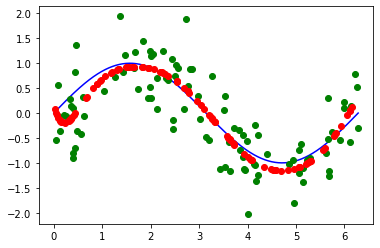

In [7]:
model = PolynomialBasisLeastSquaresRegression(m_degrees=10)
model.fit(X, y)

X_samples = np.random.uniform(low=0.0, high=2 * np.pi, size=100)
y_predictions = model.predict(X_samples)

plt.plot(curve_x, curve_y, "b-", X, y, "go", X_samples, y_predictions, "ro")

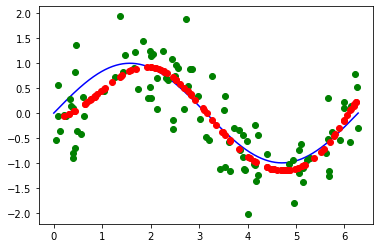

In [8]:
model = PolynomialBasisLeastSquaresRegression(
    m_degrees=10, regularization_coefficient=1.2
)
model.fit(X, y)

X_samples = np.random.uniform(low=0.0, high=2 * np.pi, size=100)
y_predictions = model.predict(X_samples)

plt.plot(curve_x, curve_y, "b-", X, y, "go", X_samples, y_predictions, "ro")